CAP4612 Homework 4 - Sehyun Cho 
LASSO application

In [188]:
'''
Sehyun Cho
CAP4612
LASSO application, reducing higher order terms from the overfitted model. 
    y = B0 + B1*x + B2*(x**2) + ... + B9*(x**9) + B10*(x**10) + e
    
    1. obtain complex model using linear regression with higher-order terms, which overfitted model
    2. use LASSO to remove the higher-order terms(reduce complexity) gradually -> get a "robust model"
    3. reduce more higher order-terms to reduce complexity, which underfitted model
'''
# import libraries 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [189]:
# import dataset 
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])


In [190]:
# Concat two datasets in one dataset
n = np.size(x)
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,-6.860121,0.8116
1,-4.324130,0.9072
2,-4.358625,0.9052
3,-4.358427,0.9039
4,-6.955852,0.8053
...,...,...
77,-5.132415,0.8964
78,-4.811353,0.8963
79,-4.098269,0.9074
80,-3.661743,0.9119


C:\Users\takem\AppData\Local\Temp\ipykernel_10276\4034745647.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',color='blue')


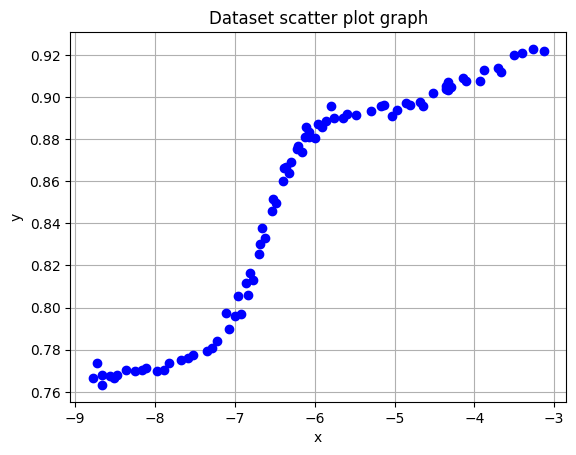

In [191]:
# Create plot graph for the current dataset
plt.plot(x,y,'ro',color='blue')
plt.title("Dataset scatter plot graph")
plt.xlabel('x')
plt.grid()
plt.ylabel('y')
plt.show()

In [192]:
'''
Pattern of the equation
N = 1 : y = b_0 + (b_1*x)
N = 2 : y = b_0 + (b_1*x) + (b_2*x^2)  == b_0 + b_1*x_1 + b_2*x_2
N = 3 : y = b_0 + (b_1*x) + (b_2*x^2) + (b_3*x^3) == b_0 + b_1*x_1 + b_2*x_2 + b_3*x_3
obtain complex model using linear regression with higher-order terms, which overfitted model
'''

# Dataset conversion process (Table for illustrate purpose)
x1 = x
x2 = pow(x1,2)
x3 = pow(x1,3)
x4 = pow(x1,4)
x5 = pow(x1,5)
x6 = pow(x1,6)
x7 = pow(x1,7)
x8 = pow(x1,8)
x9 = pow(x1,9)
x10 = pow(x1,10)

N2 = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
N3 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3, 'y':y})
N4 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4 ,'y':y})
N5 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'y':y})
N6 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'x6':x6, 'y':y})
N7 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'y':y})
N8 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8': x8, 'y':y})
N9 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8': x8, 'x9':x9, 'y':y})
N10 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3':x3,'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8': x8, 'x9':x9, 'x10':x10, 'y':y})

# print higher order term table N = 10, which overfitted model
N10

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-6.860121,47.061259,-322.845927,2214.762094,-15193.535763,104229.492448,-715026.920996,4.905171e+06,-3.365007e+07,2.308435e+08,0.8116
1,-4.324130,18.698101,-80.853019,349.618968,-1511.797883,6537.210647,-28267.748970,1.222334e+05,-5.285532e+05,2.285533e+06,0.9072
2,-4.358625,18.997612,-82.803469,360.909276,-1573.068212,6856.414522,-29884.540122,1.302555e+05,-5.677349e+05,2.474544e+06,0.9052
3,-4.358427,18.995884,-82.792168,360.843598,-1572.710389,6854.543023,-29875.023648,1.302081e+05,-5.675025e+05,2.473418e+06,0.9039
4,-6.955852,48.383882,-336.551143,2341.000068,-16283.650894,113266.671807,-787866.248553,5.480281e+06,-3.812003e+07,2.651573e+08,0.8053
...,...,...,...,...,...,...,...,...,...,...,...
77,-5.132415,26.341680,-135.196427,693.884125,-3561.301065,18278.073839,-93810.654364,4.814752e+05,-2.471130e+06,1.268287e+07,0.8964
78,-4.811353,23.149115,-111.378556,535.881518,-2578.314991,12405.182802,-59685.709816,2.871690e+05,-1.381671e+06,6.647708e+06,0.8963
79,-4.098269,16.795811,-68.833758,282.099278,-1156.118813,4738.086246,-19417.953440,7.958000e+04,-3.261403e+05,1.336611e+06,0.9074
80,-3.661743,13.408360,-49.097966,179.784121,-658.323205,2410.610236,-8827.034604,3.232233e+04,-1.183561e+05,4.333894e+05,0.9119


<function matplotlib.pyplot.show(close=None, block=None)>

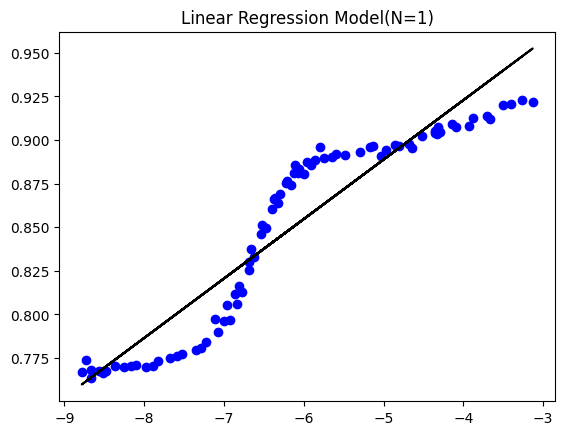

In [193]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Linear regression for the first degree of the model
first_degree = LinearRegression()

# fit and predict model
first_degree.fit(x,y)
y_pred = first_degree.predict(x)

# plot the first degree model(N=1)
plt.scatter(x,y,color='blue')
plt.title("Linear Regression Model(N=1)")
plt.plot(x, y_pred, color='black')
plt.show

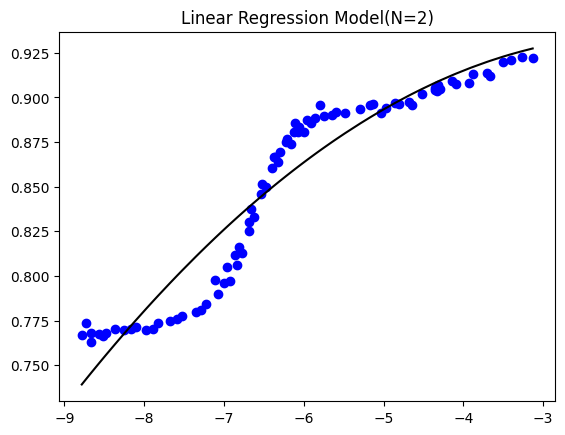

In [194]:
# Acquiring model process
poly= PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model_n2 = LinearRegression()
model_n2_fit = model_n2.fit(x_poly, y)
y_poly_pred = model_n2_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=2)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=2)")
plt.show()

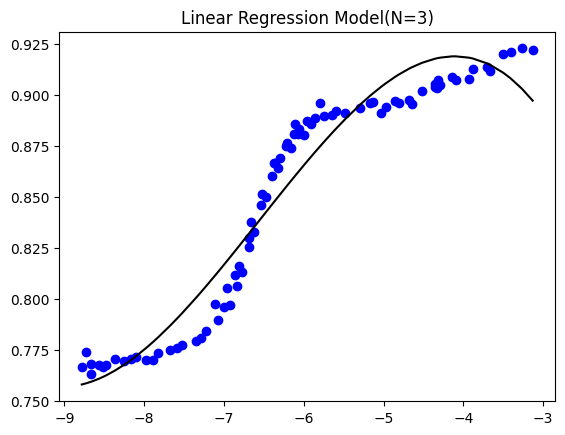

In [195]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n3 = LinearRegression()
model_n3_fit = model_n3.fit(x_poly, y)
y_poly_pred = model_n3_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=3)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=3)")
plt.show()

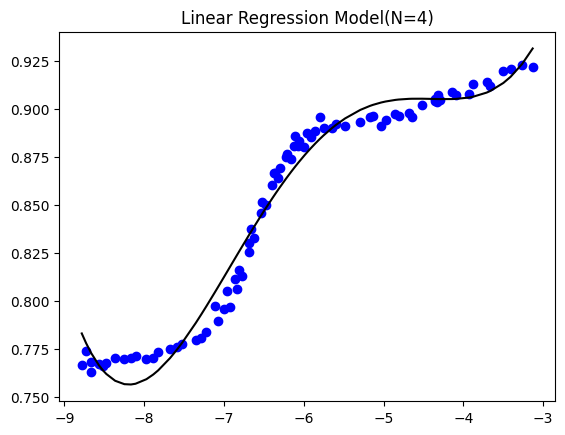

In [196]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n4 = LinearRegression()
model_n4_fit = model_n4.fit(x_poly, y)
y_poly_pred = model_n4_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=4)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=4)")
plt.show()

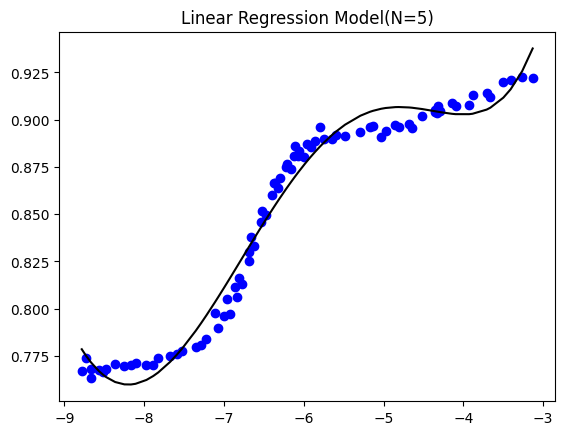

In [197]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n5 = LinearRegression()
model_n5_fit = model_n5.fit(x_poly, y)
y_poly_pred = model_n5_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=5)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=5)")
plt.show()

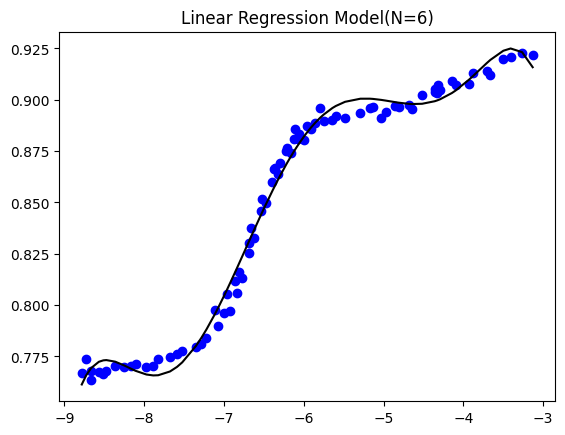

In [198]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n6 = LinearRegression()
model_n6_fit = model_n6.fit(x_poly, y)
y_poly_pred = model_n6_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=6)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=6)")
plt.show()

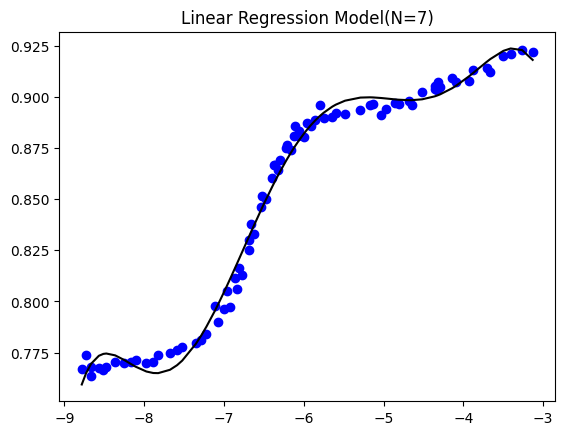

In [199]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=7)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n7 = LinearRegression()
model_n7_fit = model_n7.fit(x_poly, y)
y_poly_pred = model_n7_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=7)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=7)")
plt.show()

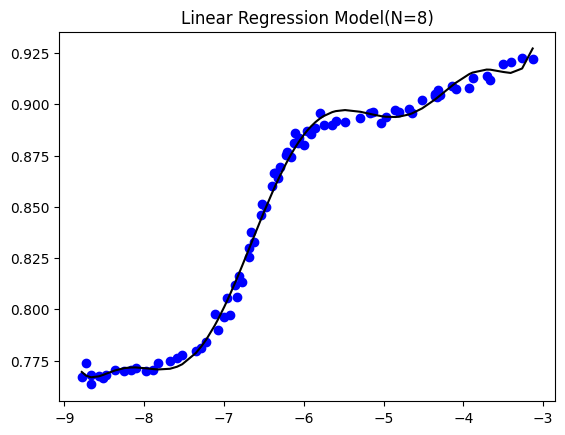

In [200]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n8 = LinearRegression()
model_n8_fit = model_n8.fit(x_poly, y)
y_poly_pred = model_n8_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=8)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=8)")
plt.show()

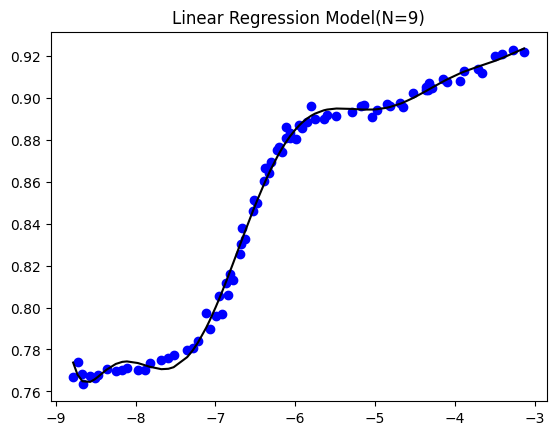

In [201]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring model process
poly= PolynomialFeatures(degree=9)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n9 = LinearRegression()
model_n9_fit = model_n9.fit(x_poly, y)
y_poly_pred = model_n9_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=9)
plt.plot(x, y_poly_pred, color='black')
plt.title("Linear Regression Model(N=9)")
plt.show()

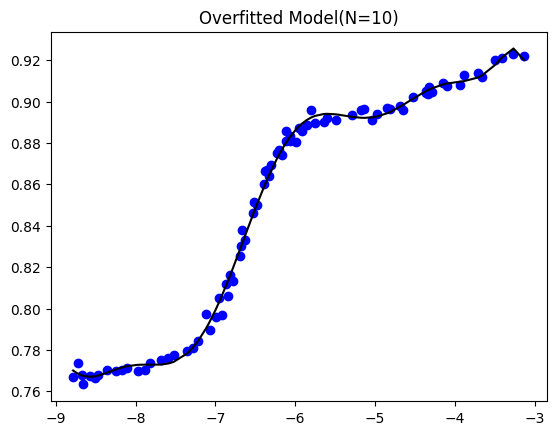

In [202]:
# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Acquiring overfitted model process
poly= PolynomialFeatures(degree=10)
x_poly = poly.fit_transform(x.reshape(-1,1))

model_n10 = LinearRegression()
model_n10_fit = model_n10.fit(x_poly, y)
y_poly_pred = model_n10_fit.predict(x_poly)

plt.scatter(x, y,color='blue')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

# Plot the model(N=10)
plt.plot(x, y_poly_pred, color='black')
plt.title("Overfitted Model(N=10)")
plt.show()

c:\Users\takem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.022e-03, tolerance: 2.432e-05
  model = cd_fast.enet_coordinate_descent(


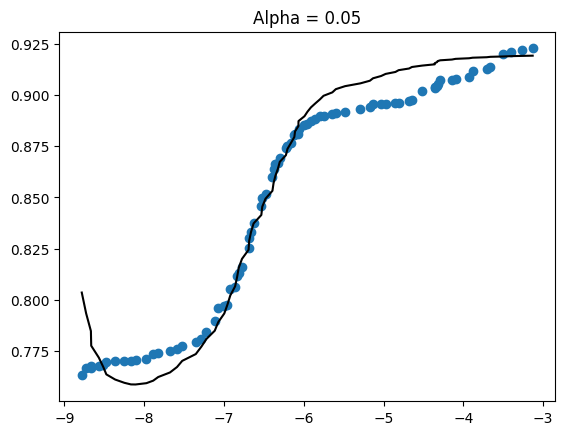

In [203]:
# Use LASSO to remove some of the terms from the equation
# parameter 'alpha' affects that

# import dataset again (for reset purpose)
x = np.array([-6.860120914, -4.324130045, -4.358625055, -4.358426747, -6.955852379, -6.661145254, -6.355462942, -6.118102026, -7.115148017,
     -6.815308569, -6.519993057, -6.204119983, -5.853871964, -6.109523091, -5.79832982, -5.482672118, -5.171791386, -4.851705903,
     -4.517126416, -4.143573228, -3.709075441, -3.499489089, -6.300769497, -5.953504836, -5.642065153, -5.031376979, -4.680685696,
     -4.329846955, -3.928486195, -8.56735134, -8.363211311, -8.107682739, -7.823908741, -7.522878745, -7.218819279, -6.920818754,
     -6.628932138, -6.323946875, -5.991399828, -8.781464495, -8.663140179, -8.473531488, -8.247337057, -7.971428747, -7.676129393,
     -7.352812702, -7.072065318, -6.774174009, -6.478861916, -6.159517513, -6.835647144, -6.53165267, -6.224098421, -5.910094889,
     -5.598599459, -5.290645224, -4.974284616, -4.64454848, -4.290560426, -3.885055584, -3.408378962, -3.13200249, -8.726767166,
     -8.66695597, -8.511026475, -8.165388579, -7.886056648, -7.588043762, -7.283412422, -6.995678626, -6.691862621, -6.392544977,
     -6.067374056, -6.684029655, -6.378719832, -6.065855188, -5.752272167, -5.132414673, -4.811352704, -4.098269308, -3.66174277,
     -3.2644011])

y = np.array([0.8116, 0.9072, 0.9052, 0.9039, 0.8053, 0.8377, 0.8667, 0.8809, 0.7975, 0.8162, 0.8515, 0.8766, 0.8885, 0.8859, 0.8959, 0.8913,
     0.8959, 0.8971, 0.9021, 0.909, 0.9139, 0.9199, 0.8692, 0.8872, 0.89, 0.891, 0.8977, 0.9035, 0.9078, 0.7675, 0.7705, 0.7713,
     0.7736, 0.7775, 0.7841, 0.7971, 0.8329, 0.8641, 0.8804, 0.7668, 0.7633, 0.7678, 0.7697, 0.77, 0.7749, 0.7796, 0.7897, 0.8131,
     0.8498, 0.8741, 0.8061, 0.846, 0.8751, 0.8856, 0.8919, 0.8934, 0.894, 0.8957, 0.9047, 0.9129, 0.9209, 0.9219, 0.7739, 0.7681,
     0.7665, 0.7703, 0.7702, 0.7761, 0.7809, 0.7961, 0.8253, 0.8602, 0.8809, 0.8301, 0.8664, 0.8834, 0.8898, 0.8964, 0.8963, 0.9074, 0.9119, 0.9228])

# Apply lasso when alpha = 0.05 (reduce higher order terms)
lasso = Lasso(alpha= 0.05)
poly2 = PolynomialFeatures(degree = 10)
# Sort x and y 
x.sort()
y.sort()
x = x.reshape(-1,1)

# use pipeline to use both polynomial and lasso
pipeline = Pipeline([("poly", poly2), ("lasso", lasso)])
pipeline.fit(x,y)

X_test = np.linspace(-9,-3,82)
y_pred = pipeline.predict(X_test[:,np.newaxis])

# plot datapoints and vector
plt.scatter(x,y)
plt.title("Alpha = 0.05")
plt.plot(x, y_pred, color='black')

c:\Users\takem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.102e-03, tolerance: 2.432e-05
  model = cd_fast.enet_coordinate_descent(


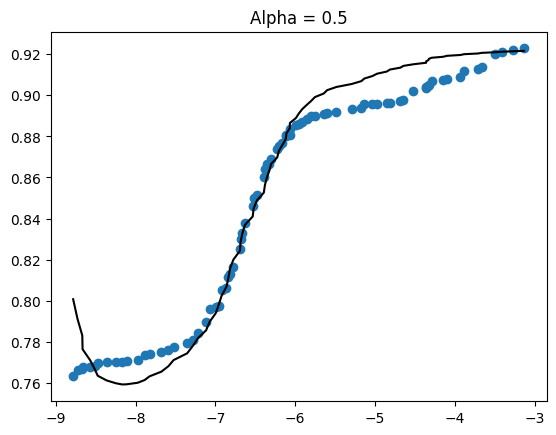

In [204]:
# Apply lasso when alpha = 0.5 (reduce higher order terms)
lasso = Lasso(alpha= 0.5)
poly2 = PolynomialFeatures(degree = 10)
# Sort x and y 
x.sort()
y.sort()
x = x.reshape(-1,1)

# use pipeline to use both polynomial and lasso
pipeline = Pipeline([("poly", poly2), ("lasso", lasso)])
pipeline.fit(x,y)

X_test = np.linspace(-9,-3,82)
y_pred = pipeline.predict(X_test[:,np.newaxis])

# plot datapoints and vector
plt.scatter(x,y)
plt.title("Alpha = 0.5")
plt.plot(x, y_pred, color='black')

c:\Users\takem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.666e-03, tolerance: 2.432e-05
  model = cd_fast.enet_coordinate_descent(


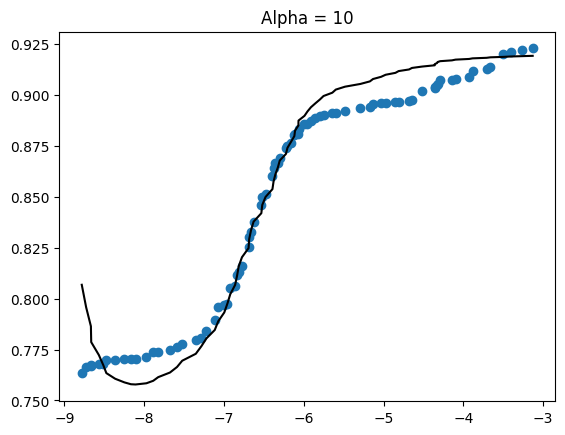

In [205]:
# Apply lasso when alpha = 10 (reduce higher order terms)
lasso = Lasso(alpha= 10)
poly2 = PolynomialFeatures(degree = 10)
# Sort x and y 
x.sort()
y.sort()
x = x.reshape(-1,1)

# use pipeline to use both polynomial and lasso
pipeline = Pipeline([("poly", poly2), ("lasso", lasso)])
pipeline.fit(x,y)

X_test = np.linspace(-9,-3,82)
y_pred = pipeline.predict(X_test[:,np.newaxis])

# plot datapoints and vector
plt.scatter(x,y)
plt.title("Alpha = 10")
plt.plot(x, y_pred, color='black')

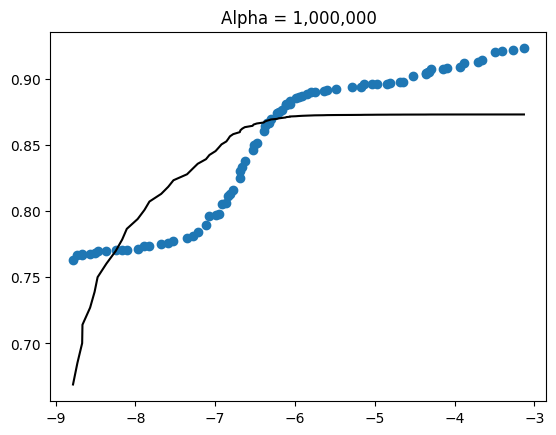

In [206]:
# Apply lasso when alpha = 1,000,000 (reduce higher order terms)
lasso = Lasso(alpha= 1000000)
poly2 = PolynomialFeatures(degree = 10)
# Sort x and y 
x.sort()
y.sort()
x = x.reshape(-1,1)

# use pipeline to use both polynomial and lasso
pipeline = Pipeline([("poly", poly2), ("lasso", lasso)])
pipeline.fit(x,y)

X_test = np.linspace(-9,-3,82)
y_pred = pipeline.predict(X_test[:,np.newaxis])

# plot datapoints and vector
plt.scatter(x,y)
plt.title("Alpha = 1,000,000")
plt.plot(x, y_pred, color='black')